# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**Instructer in Charge:** Dr. Rajesh Kumar Tripathy \
**Teaching Assistant:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 11**

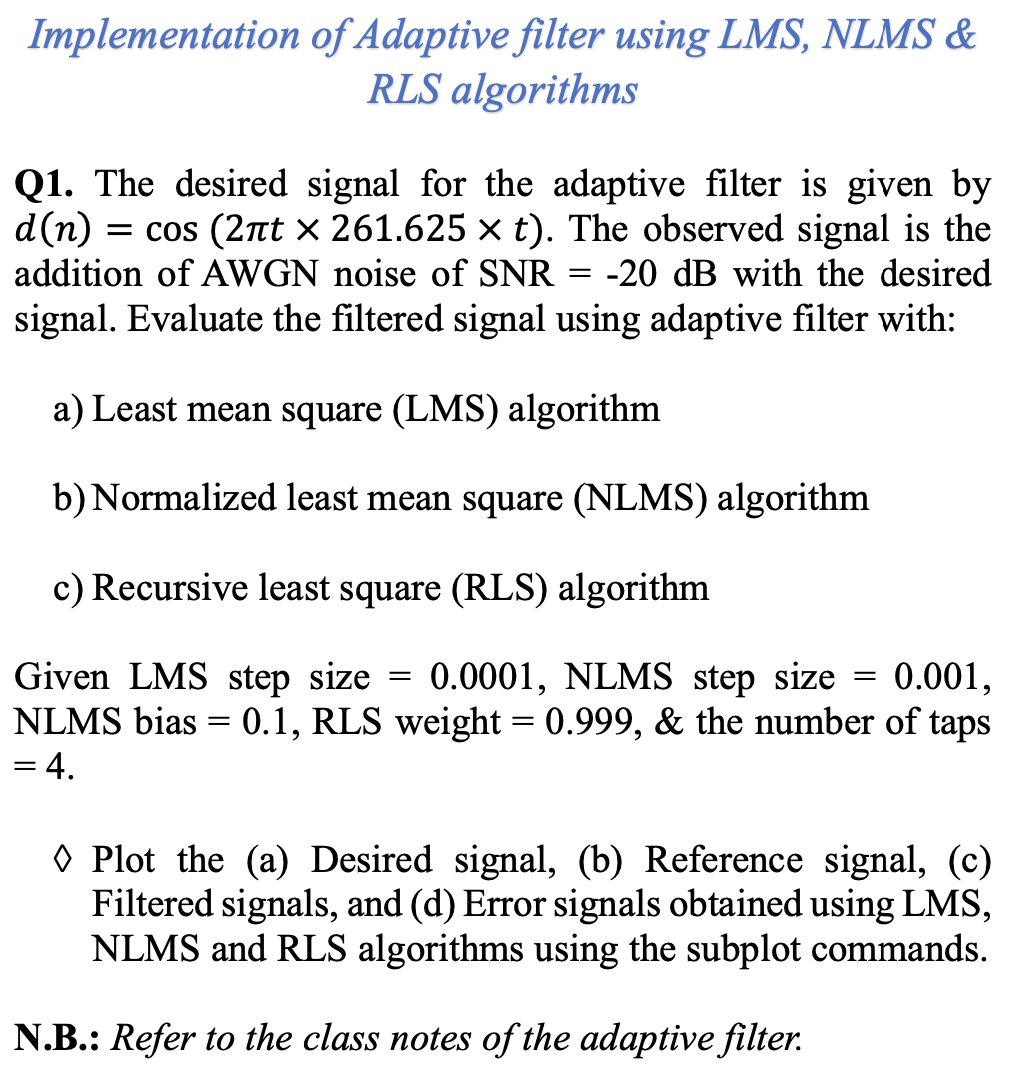

## *Python Code-*

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function block for LMS
def myLMS(d, x, mu, M):
    Ns = len(d)
    if Ns <= M:
        print('Error: The signal length is less than the filter order')
        return
    if Ns != len(x):
        print('Error: Input signal and reference signal have different lengths')
        return

    x = x
    xx = np.zeros(M)
    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))
    for n in range(Ns):
        xx = np.roll(xx, shift=-1)
        xx[-1] = x[n]
        y[n] = np.dot(w1, xx)
        e[n] = d[n] - y[n]
        w1 = w1 + mu * e[n] * xx
        w[:, n] = w1

    return e, y, w

In [3]:
# Function block for RLS
def myRLS(d, x, lamda, M):
    Ns = len(d)
    if Ns <= M:
        print('Error: The signal length is less than the filter order')
        return
    if Ns != len(x):
        print('Error: Input signal and reference signal have different lengths')
        return

    I = np.eye(M)
    a = 0.01
    p = a * I

    x = x
    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))
    xx = np.zeros(M)

    for n in range(Ns):
        xx = np.roll(xx, shift=1)
        xx[0] = x[n]
        k = np.dot(p, xx) / (lamda + np.dot(xx.T, np.dot(p, xx)))
        y[n] = np.dot(xx, w1)
        e[n] = d[n] - y[n]
        w1 = w1 + k * e[n]
        p = (p - np.outer(k, np.dot(xx.T, p))) / lamda
        w[:, n] = w1

    return e, y, w

In [4]:
# Function block for NLMS
def myNLMS(d, x, mu, M, a):
    Ns = len(d)
    if Ns <= M:
        print('Error: The signal length is less than the filter order')
        return
    if Ns != len(x):
        print('Error: Input signal and reference signal have different lengths')
        return

    x = x
    xx = np.zeros(M)
    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))

    for n in range(Ns):
        xx = np.roll(xx, shift=-1)
        xx[-1] = x[n]
        y[n] = np.dot(w1, xx)
        k = mu / (a + np.dot(xx, xx))
        e[n] = d[n] - y[n]
        w1 = w1 + k * e[n] * xx
        w[:, n] = w1

    return e, y, w

In [5]:
# Parameters
fs = 8000
t = np.arange(0, 5, 1/fs)
noise = np.random.normal(0, 10**(-20/20), len(t))
d = np.cos(2 * np.pi * t * 261.625)
x = noise + np.cos(2 * np.pi * t * 261.625)

mu = 0.0001
mu2 = 0.001
a = 0.1
lamda = 0.999
M = 4

# LMS, NLMS, RLS performance
e1, y1, w1 = myLMS(d, x, mu, M)
e2, y2, w2 = myNLMS(d, x, mu2, M, a)
e3, y3, w3 = myRLS(d, x, lamda, M)

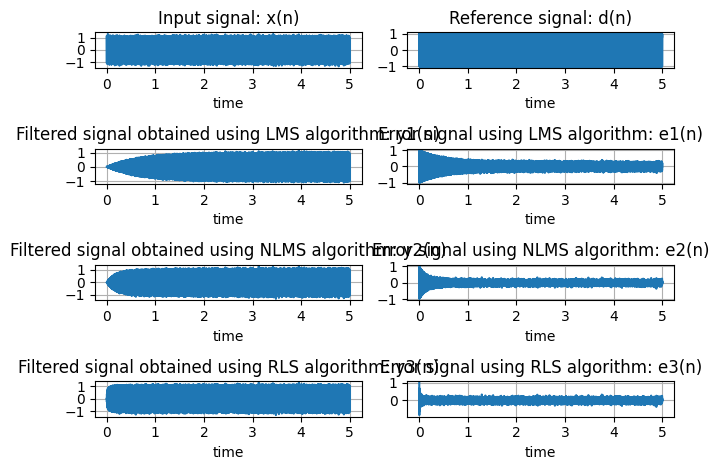

In [6]:
# Plot input signal, reference signal, filtered output, error
plt.subplot(421)
plt.plot(np.arange(len(x))/fs, x)
plt.xlabel('time')
plt.title('Input signal: x(n)')
plt.grid(True)

plt.subplot(422)
plt.plot(np.arange(len(d))/fs, d)
plt.xlabel('time')
plt.title('Reference signal: d(n)')
plt.grid(True)

plt.subplot(423)
plt.plot(np.arange(len(y1))/fs, y1)
plt.xlabel('time')
plt.title('Filtered signal obtained using LMS algorithm: y1(n)')
plt.grid(True)

plt.subplot(425)
plt.plot(np.arange(len(y2))/fs, y2)
plt.xlabel('time')
plt.title('Filtered signal obtained using NLMS algorithm: y2(n)')
plt.grid(True)

plt.subplot(427)
plt.plot(np.arange(len(y3))/fs, y3)
plt.xlabel('time')
plt.title('Filtered signal obtained using RLS algorithm: y3(n)')
plt.grid(True)

plt.subplot(424)
plt.plot(np.arange(len(e1))/fs, e1)
plt.xlabel('time')
plt.title('Error signal using LMS algorithm: e1(n)')
plt.grid(True)

plt.subplot(426)
plt.plot(np.arange(len(e2))/fs, e2)
plt.xlabel('time')
plt.title('Error signal using NLMS algorithm: e2(n)')
plt.grid(True)

plt.subplot(428)
plt.plot(np.arange(len(e3))/fs, e3)
plt.xlabel('time')
plt.title('Error signal using RLS algorithm: e3(n)')
plt.grid(True)

plt.tight_layout()
plt.show()
